# Mineração de Dados Massivos
## Analise de descrição de mercadorias de Notas Fiscais Eletrônicas

# Ambiente

## Bibliotecas

In [1]:
# Iniciando Ambiente
import numpy as np, pandas as pd, time, random
import datetime as dt
import re 

import nltk
from nltk.corpus import stopwords
import unicodedata


# Se necessário, descomente as linhas a seguir para ler as stopwords
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\svpon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Módulos

In [2]:
# Módulos de código de programação
#!pip install import-ipynb
import import_ipynb
# Carga de Arquivos
from carga import doCarga
# Tratamento de Dados         
from tratamento import doTratamento
# Processamento Naive Bayers
#from naivebayers import doNaiveBayers

from MLPClassifier import *
from SGDClassifier import *

importing Jupyter notebook from carga.ipynb
importing Jupyter notebook from tratamento.ipynb
importing Jupyter notebook from MLPClassifier.ipynb
importing Jupyter notebook from SGDClassifier.ipynb


In [3]:
# Contador de tempo
def tic():
    global _start_time 
    _start_time = time.time()

def tac():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('Duração: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

## Variáveis de Ambiente

In [4]:
# Pasta aonde estão os dados
diretorio = '..\\dados\\'
#diretorio = "F:\\Weisner\\Documentos\\MEGA Estudos\\UNB - MDM - Mineração de Dados Massivos\\Artigo\\" 


# Abre arquivo de dados

In [5]:
# Carrega os dados
dfNotas = doCarga(diretorio, opcao=3)
print ("{} registros carregados".format(dfNotas.size))

297438 registros carregados


# Processa se necessário

In [6]:
## Chama processamento manualmente

#df_original = doTratamento(df_original)
#df_original.NovaDescricao
#df_original.info()
#tac()
dfNotas

,Remetente,Categoria,NovaDescricao
0,Fornecedor 001,30.0simsim,CACHACA SAO FRANCISCO 12X970M
1,Fornecedor 001,30.0simsim,CACHACA YPIOCA EMP.OURO
2,Fornecedor 001,30.0simsim,CACHACA YPIOCA OURO
3,Fornecedor 001,30.0simsim,CACHACA YPIOCA PRATA
4,Fornecedor 002,30.0simsim,BB CACHACA SAGATIBA PURA (12) GF
...,...,...,...
99995,Fornecedor 047,38.0simnão,SHAMP.INF.BEBE NATUREZA SUAVE
99996,Fornecedor 047,38.0simnão,SHAMP.INF.BEBE NATUREZA SUAVE
99997,Fornecedor 047,38.0simnão,SHAMP.INF.CARROS II MCQUEEN
99998,Fornecedor 047,38.0simnão,SHAMP.INF.CARROS II MCQUEENNC


## Amostsra dos Dados processados

<AxesSubplot:>

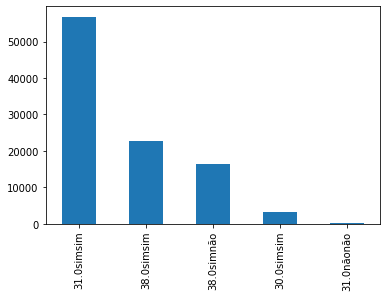

In [7]:
%matplotlib inline
dfNotas['Categoria'].value_counts().plot.bar()

# Naive Bayers

In [8]:
#print (doNaiveBayers(dfNotas))
dfNotas

,Remetente,Categoria,NovaDescricao
0,Fornecedor 001,30.0simsim,CACHACA SAO FRANCISCO 12X970M
1,Fornecedor 001,30.0simsim,CACHACA YPIOCA EMP.OURO
2,Fornecedor 001,30.0simsim,CACHACA YPIOCA OURO
3,Fornecedor 001,30.0simsim,CACHACA YPIOCA PRATA
4,Fornecedor 002,30.0simsim,BB CACHACA SAGATIBA PURA (12) GF
...,...,...,...
99995,Fornecedor 047,38.0simnão,SHAMP.INF.BEBE NATUREZA SUAVE
99996,Fornecedor 047,38.0simnão,SHAMP.INF.BEBE NATUREZA SUAVE
99997,Fornecedor 047,38.0simnão,SHAMP.INF.CARROS II MCQUEEN
99998,Fornecedor 047,38.0simnão,SHAMP.INF.CARROS II MCQUEENNC


# Análise

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split


In [10]:
%matplotlib inline
rcParams['figure.figsize'] = 10,6
#warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

# Preleção
Preparação dos datasets utilizado em todos algorítimos

In [11]:
# Separa os contadores
count_class_0, count_class_1, count_class_2, count_class_3, count_class_4 = dfNotas['Categoria'].value_counts()

In [12]:
# Divide datasets por classes

df_class_0 = dfNotas[dfNotas['Categoria'] == "31.0simsim"]
df_class_1 = dfNotas[dfNotas['Categoria'] == "38.0simsim"]
df_class_2 = dfNotas[dfNotas['Categoria'] == "38.0simnão"] 
df_class_3 = dfNotas[dfNotas['Categoria'] == "30.0simsim"]         # Tamanho escolhido
df_class_4 = dfNotas[dfNotas['Categoria'] == "31.0nãonão"]         # Classse MUITO pequena - UNDERSAMPLING

# Equipara os tamanhos 30.0simsim que tem 3090 ocorrências
# Foram equiparados ao tamanho da classe 3
MaxSize = df_class_3.size 
df_class_0 = df_class_0.sample(MaxSize)
df_class_1 = df_class_1.sample(MaxSize)
df_class_2 = df_class_2.sample(MaxSize)

# Random Oversampling
df_class_4 = df_class_4.sample(MaxSize, replace=True)

# Agrupa novamente
dfAjustado = pd.concat([df_class_0, df_class_1, df_class_2, df_class_3, df_class_4], axis=0)

In [49]:
#  Separar Dados de Atributos
X = dfAjustado.iloc[:, 1:2].values  # Categoria
y = dfAjustado.iloc[:, 2:3].values  # NovaDescricao

In [50]:
type(X)

numpy.ndarray

In [51]:
# Recorta os datasets de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Algorítimos

## Naives

In [41]:
#W
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [63]:
X_train

array([['38.0simsim'],
       ['31.0simsim'],
       ['38.0simsim'],
       ...,
       ['31.0nãonão'],
       ['31.0simsim'],
       ['38.0simsim']], dtype=object)

In [69]:
# W

Result = sklearn.model_selection.cross_val_score(text_clf, X_train, y_train, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\m

In [43]:
print (Result)

[nan nan nan nan nan]


In [70]:
# T
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Cria o modelo baseado no Multinomial Naive_Bayes
model = make_pipeline(TfidfTransformer, MultinomialNB)

In [75]:
#T
# Treina o modelo com o dados de treinamento
result = model.fit(X_train, y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'fit'

In [86]:
#J
classificador = nltk.NaiveBayesClassifier.train(X_train)

ValueError: not enough values to unpack (expected 2, got 1)

# Avaliação

In [ ]:
def doModelReport(y_actual, y_predicted):
    print("Accuracy = ", accuracy_score(y_actual, y_predicted))
    print("Precision = ", precision_score(y_actual, y_predicted))
    print("Recall = ", recall_score(y_actual, y_predicted))
    print("F1 Score", f1_score(y_actual, y_predicted))

In [ ]:
def doCurvaAucRoc(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thsholds = roc_curve(Y_test, y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr, tpr, label= "Curva AUC ROC com Area sob curva = " + str(auc))
    plt.show()
    pass

In [ ]:
# Converter os atributos Categóricos do tipo string para numéricos
from sklearn.preprocessing import LabelEncoder
lbDescricao = LabelEncoder()
lbCategoria = LabelEncoder()
# X[:, 0] = lbDescricao.fit_transform(X[:, 0])
y[:, 0] = lbCategoria.fit_transform(y[:, 0])

### Categórico para Numérico

In [ ]:
# Prepara os Enconders para cada categria
from sklearn.preprocessing import LabelEncoder
categoria = LabelEncoder()
X[:, 0] = categoria.fit_transform(X[:, 0])
## TODO ONE HOT ENCODER

In [ ]:
#Grava até este ponto pra ganhar tempo
import pickle
with open('atributos_encode.pkl', 'wb') as f:
    pickle.dump([X, y], f)

In [ ]:
from sklearn.naive_bayes import GaussianNB # Distribuição Normal
naive_Classificacao = GaussianNB()
naive_Classificacao.fit(X, y) # Treinamento

In [ ]:
previsao = naive_Classificacao.predict('bebida')

# MLPClassifier

# SGDCClassifier